# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques
---


In [124]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 
from skimage.morphology import disk, square, rectangle, star, diamond
from skimage.filters.rank import mean
from PIL import Image

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

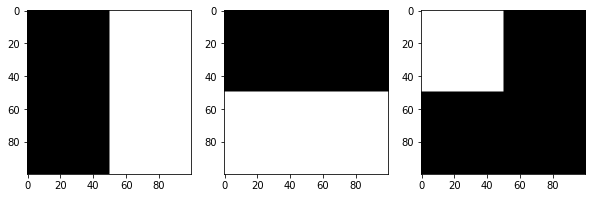

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


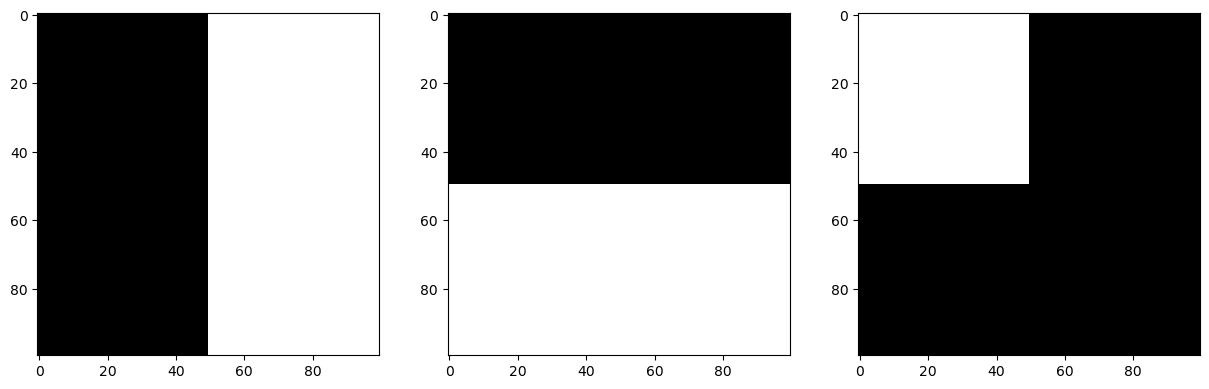

In [60]:
# solution
#creating image 1
image1 = np.zeros((100,100))
image1[:, 50:] = 1
#plt.imshow(image1, cmap='gray')
#plt.show()

#creating image 2
image2 = np.zeros((100,100))
image2[50:, :] = 1
#plt.imshow(image2, cmap='gray')
#plt.show()

#creating image 3
image3 = np.zeros((100,100))
image3[:50, :50] = 1
#plt.imshow(image3, cmap='gray')
#plt.show()

#Defining the subplot
fig, ax = plt.subplots(1,3, figsize=(15,15))

#Printing images
ax[0].imshow(image1, cmap='gray')
ax[1].imshow(image2, cmap='gray')
ax[2].imshow(image3, cmap='gray')

plt.show()

*   Use the above three images to create the following image

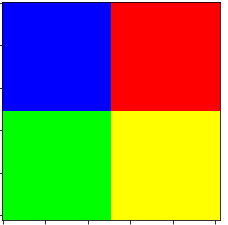
*Hint: Remember channels and color spaces*

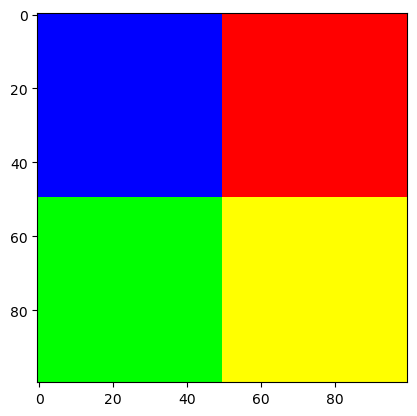

In [56]:
# solution
color_image = np.zeros((100,100,4))

#Defining the colors
color_image[:50, :50] = [0,0,1,1] #Blue
color_image[50:, :50] = [0,1,0,1] #Green
color_image[:50, 50:] = [1,0,0,1] #Red
color_image[50:, 50:] = [1,1,0,1] #Yellow

#Printing the image
plt.imshow(color_image)
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

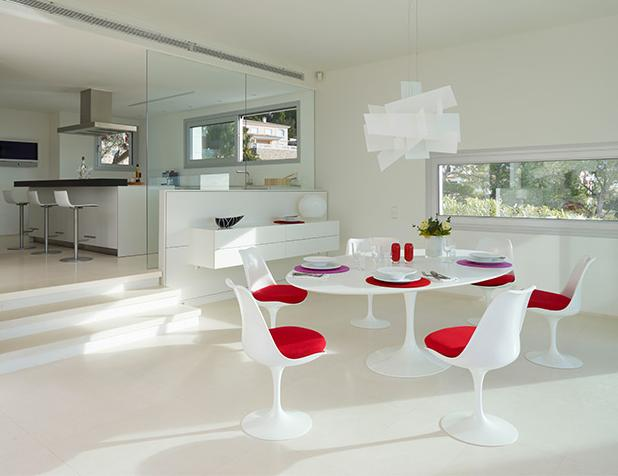

*   Extract individual channels and plot them using matplotlib subplot.



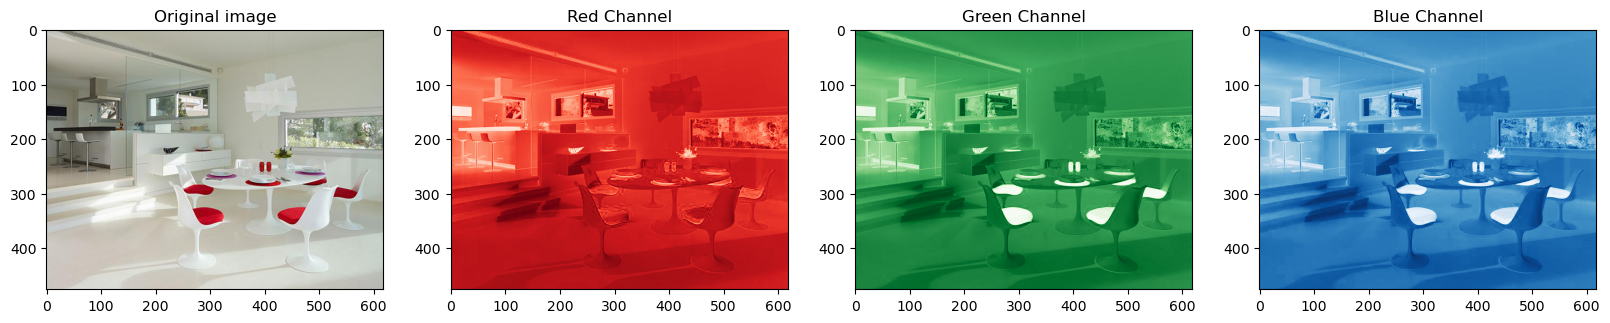

In [61]:
# solution
# Load an image
image_sillas = Image.open('images/sillas.jpg')
image_sillas_np = np.array(image_sillas)

#Getting the channels
red_channel = image_sillas_np[:, :, 0]
green_channel = image_sillas_np[:, :, 1]
blue_channel = image_sillas_np[:, :, 2]

#Creating a 1x4 subplot
fig, axs = plt.subplots(1, 4, figsize=(20,5))

#Display the original image
axs[0].imshow(image_sillas_np)
axs[0].set_title('Original image')

#Display the red channel
axs[1].imshow(red_channel, cmap='Reds')
axs[1].set_title('Red Channel')

#Display the green channel
axs[2].imshow(green_channel, cmap='Greens')
axs[2].set_title('Green Channel')

#Display the blue channel
axs[3].imshow(blue_channel, cmap='Blues')
axs[3].set_title('Blue Channel')

plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

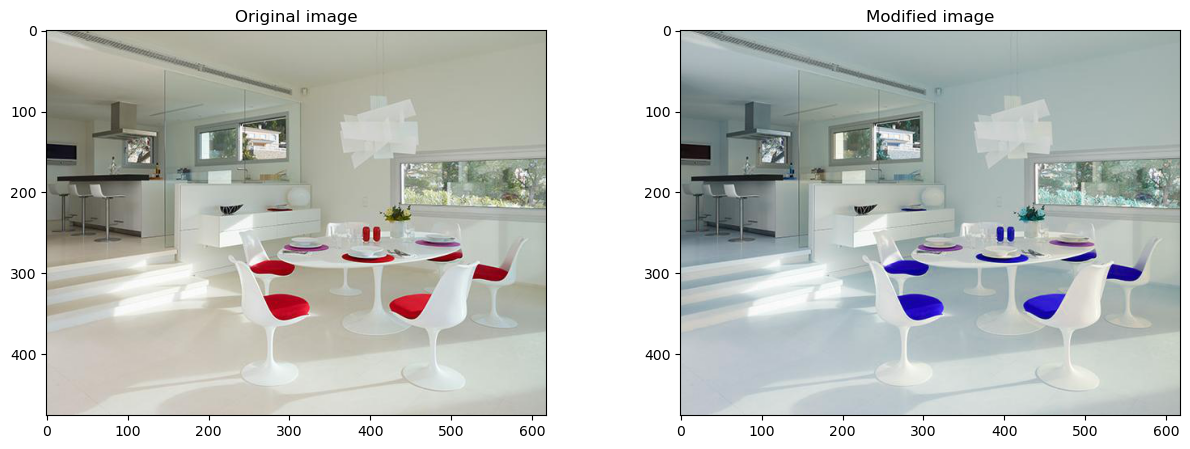

In [62]:
# solution
#Modified image
image_mod = image_sillas_np.copy()

#Swapping blues and reds
image_mod[:, :, 0] = image_sillas_np[:, :, 2] #Changing the red channel to blue channel
image_mod[:, :, 2] = image_sillas_np[:, :, 0] #Changing the blue channel to red channel

#Creating a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(15,5))

#Display the original image
axs[0].imshow(image_sillas_np)
axs[0].set_title('Original image')

#Display the modified image
axs[1].imshow(image_mod)
axs[1].set_title('Modified image')

plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

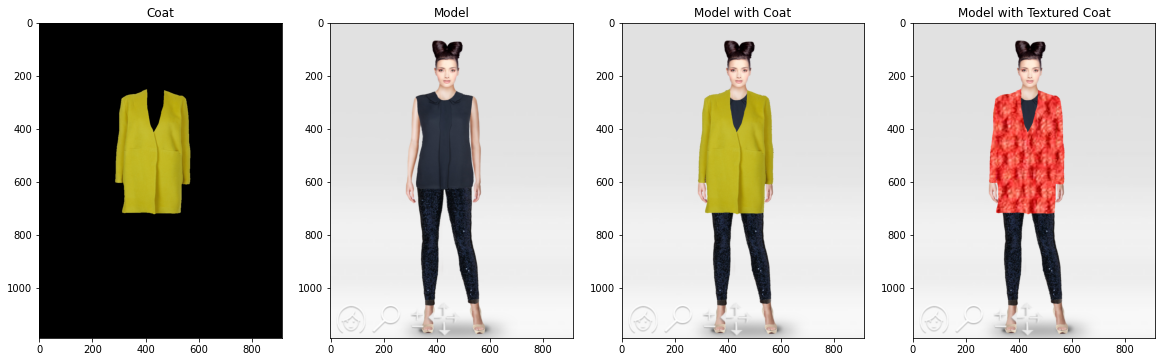

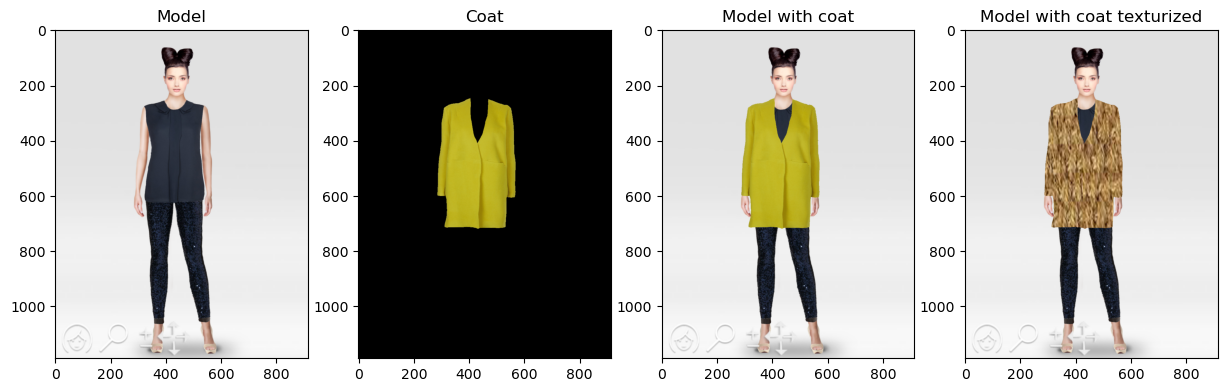

In [81]:
# solution
# Load the images
model = Image.open('images/model.png').convert("RGBA")
coat = Image.open('images/coat.png').convert("RGBA")
texture = Image.open('images/texture.png').convert("RGBA")

# Resize texture to the size of the coat
texture = texture.resize(coat.size)

# Convert to arrays
image_model = np.array(model)
image_coat = np.array(coat)
image_texture = np.array(texture)

#Creating a mask for the coat
gray_coat = cv2.cvtColor(image_coat, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_coat, 10, 255, cv2.THRESH_BINARY)

#Inverting the mask
mask_inv = cv2.bitwise_not(mask)

#Applying the mask to the coat
model_with_coat = cv2.bitwise_and(image_model, image_model, mask=mask_inv)

#combining the model + coat
model_with_coat = cv2.add(model_with_coat, image_coat)
model_with_coat_img = Image.fromarray(model_with_coat)

#Apply the mask to the coat
model_bg = cv2.bitwise_and(image_model, image_model, mask=mask_inv)

#applying the texture to the coat
textured_coat = cv2.bitwise_and(image_texture, image_texture, mask=mask)

#combining
combined = cv2.add(model_bg, textured_coat)

#converting to an image 
final_image = Image.fromarray(combined)

#Creating subplots
plt.figure(figsize=(15,5))

#Plotting all the images
plt.subplot(1,4,1)
plt.imshow(image_model)
plt.title('Model')

plt.subplot(1,4,2)
plt.imshow(image_coat)
plt.title('Coat')

plt.subplot(1,4,3)
plt.imshow(model_with_coat_img)
plt.title('Model with coat')

plt.subplot(1,4,4)
plt.imshow(final_image)
plt.title('Model with coat texturized')


plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




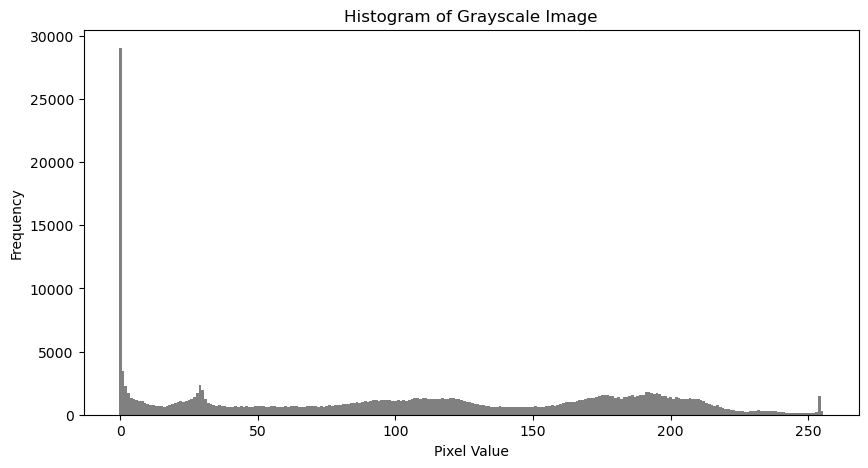

In [110]:
# solution
#Reading the image
astronaut = data.astronaut()

#Converting to grayscale
astronaut_gray = cv2.cvtColor(astronaut, cv2.COLOR_BGR2GRAY)

#Histogram of the image
histogram = exposure.histogram(astronaut_gray)

#Ploting the histogram
plt.figure(figsize=(10, 5))
plt.bar(range(256), histogram[0], width=1, color='gray')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

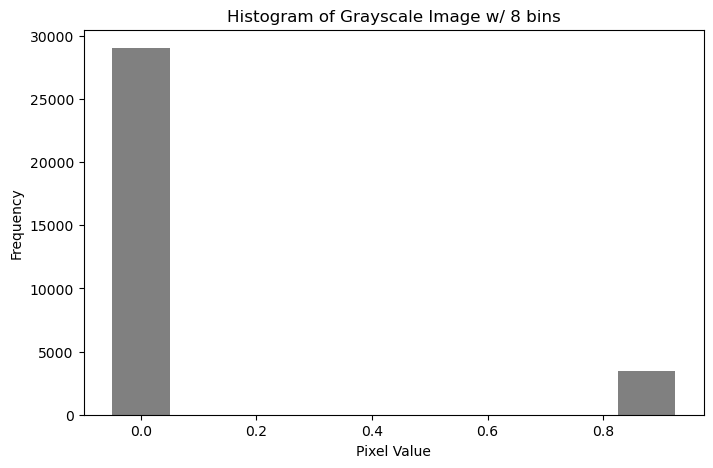

In [111]:
# solution
hist, bins = np.histogram(astronaut_gray, bins=8, range=(0,1))

plt.figure(figsize=(8, 5))
plt.bar(bins[:-1], hist, width=0.1, color='gray')
plt.title('Histogram of Grayscale Image w/ 8 bins')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

By setting the bin count  to 8, I have a better understanding of the distribution of the pixels by each bin. However, my inference does not change a lot - in the first histogram, is clear that the frequency of pixel values are higher in the lowest and highest pixels, and the same is reflected in the second histogram.

When the bin counts is very low, is more clear the distribution.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


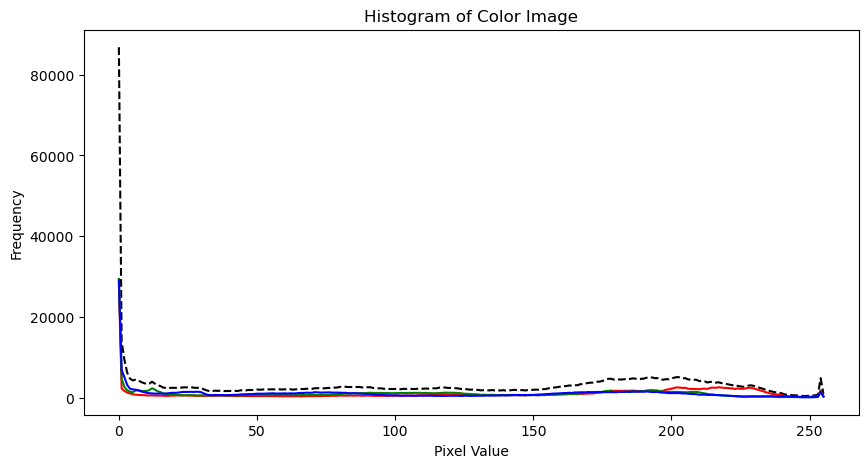

In [114]:
#solution
#Histogram of the image
hist_red, bins_r = np.histogram(astronaut[:,:,0].flatten(), bins = 256, range=(0, 256))
hist_green, bins_g = np.histogram(astronaut[:,:,1].flatten(), bins=256, range=(0,256))
hist_blue, bins_b = np.histogram(astronaut[:,:,2].flatten(), bins=256, range=(0,256))

#Ploting the histogram
plt.figure(figsize=(10, 5))

plt.plot(bins_r[:-1], hist_red + hist_green + hist_blue, color='black', label='Total', linestyle='--')
plt.plot(bins_r[:-1], hist_red, color='red', label='red')
plt.plot(bins_g[:-1], hist_green, color='green', label='green')
plt.plot(bins_b[:-1], hist_blue, color='blue', label='blue')

plt.title('Histogram of Color Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



c:\ProgramData\anaconda3\Lib\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


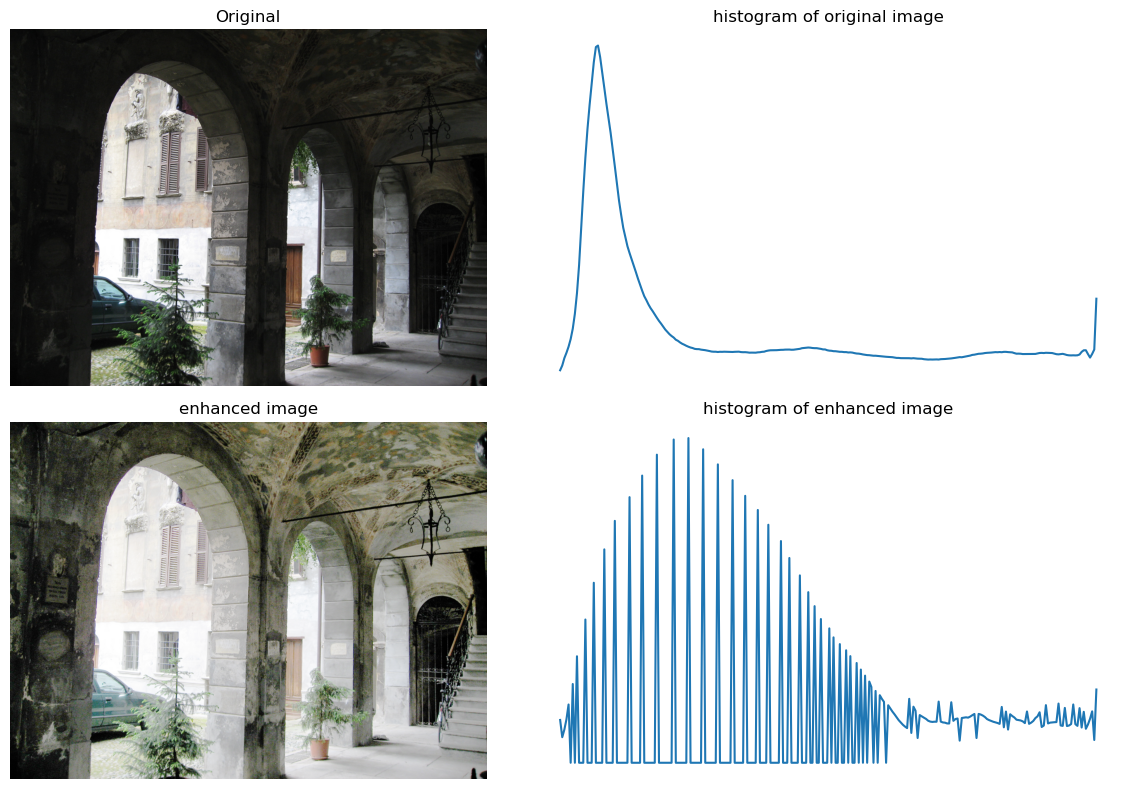

In [116]:
# solution
# Load the images
image_aqua = io.imread('images/aquatermi_lowcontrast.jpg') 

#Histogram of the image
hist_aqua, bins_aqua = exposure.histogram(image_aqua)

#Histogram equalization
enhanced_image_aqua = exposure.equalize_hist(image_aqua)
enhanced_hist_aqua, bins_enhanced = exposure.histogram(enhanced_image_aqua)

#Ploting the images and histogram
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(image_aqua)
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(bins_aqua, hist_aqua)
plt.title('histogram of original image')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(enhanced_image_aqua)
plt.title('enhanced image')
plt.axis('off')

plt.subplot(2,2,4)
plt.plot(bins_enhanced, enhanced_hist_aqua)
plt.title('histogram of enhanced image')
plt.axis('off')

plt.tight_layout()
plt.show()




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

Histogram equalization is a nonlinear transformation, while linear contrast stretching is a linear transformation.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [117]:
# solution
def linear_contrast_stretch(image, bins=256):
    #histogram of original image
    hist, _ = np.histogram(image.flatten(), bins=bins, range=(0, 1))

    #cumulative histogram
    cumulative_hist = np.cumsum(hist)

    #normalization factor
    norm_factor = (cumulative_hist.max() - cumulative_hist.min())

    #cumulative distribution function (CDF)
    cdf = cumulative_hist / norm_factor

    # Linear stretch of the pixel values based on the CDF
    enhanced_image = (image - cdf.min()) * (1 / (cdf.max() - cdf.min()))

    return enhanced_image

def plot_image_and_histogram(image, bins=256):
    # histogram of image
    hist, bin_edges = np.histogram(image.flatten(), bins=bins, range=(0, 1))

    # Plot original image
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title('original image')
    plt.axis('off')

    # Plot histogram of the original image
    plt.subplot(2, 2, 2)
    plt.plot(bin_edges[:-1], hist)
    plt.title('Histogram of original image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # plot the enhanced image
    enhanced_image = linear_contrast_stretch(image, bins=bins)
    plt.subplot(2, 2, 3)
    plt.imshow(enhanced_image)
    plt.title('Enhanced image')
    plt.axis('off')

    # histogram of enhanced image
    enhanced_hist, _ = np.histogram(enhanced_image.flatten(), bins=bins, range=(0, 1))
    plt.subplot(2, 2, 4)
    plt.plot(bin_edges[:-1], enhanced_hist, color='black')
    plt.title('Histogram of enhanced image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




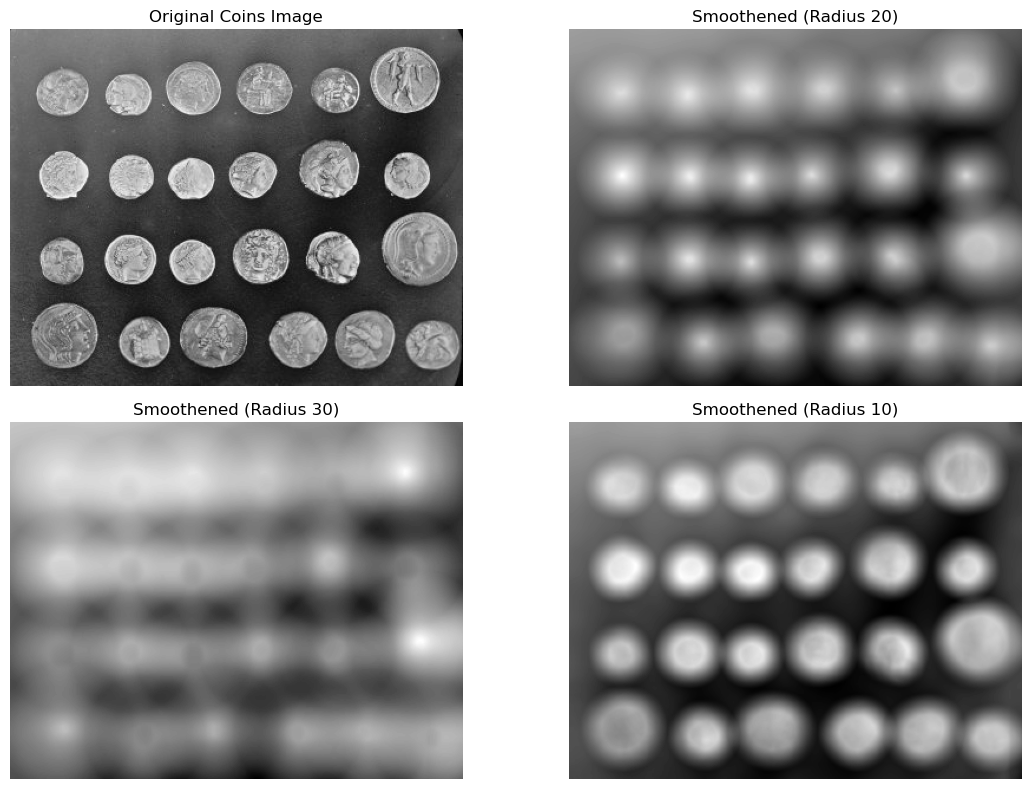

In [123]:
# solution
coins_image = data.coins()

# Define a disk structuring element (selem) of radius 20
selem_20 = disk(radius=20)

#SELEM argument was updated to FOOTPRINT

# Use mean filter using the created selem
smoothed_image_20 = mean(coins_image, footprint=selem_20)

# Increase the radius of the selem by 10 and apply the mean filter
selem_30 = disk(radius=30)
smoothed_image_30 = mean(coins_image, footprint=selem_30)

# Reduce the radius of the selem by 10 and apply the mean filter
selem_10 = disk(radius=10)
smoothed_image_10 = mean(coins_image, footprint=selem_10)

# Visualize all the smoothened images along with the original image
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(coins_image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')

# Smoothened image with selem radius 20
plt.subplot(2, 2, 2)
plt.imshow(smoothed_image_20, cmap='gray')
plt.title('Smoothened (Radius 20)')
plt.axis('off')

# Smoothened image with selem radius 30
plt.subplot(2, 2, 3)
plt.imshow(smoothed_image_30, cmap='gray')
plt.title('Smoothened (Radius 30)')
plt.axis('off')

# Smoothened image with selem radius 10
plt.subplot(2, 2, 4)
plt.imshow(smoothed_image_10, cmap='gray')
plt.title('Smoothened (Radius 10)')
plt.axis('off')

plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

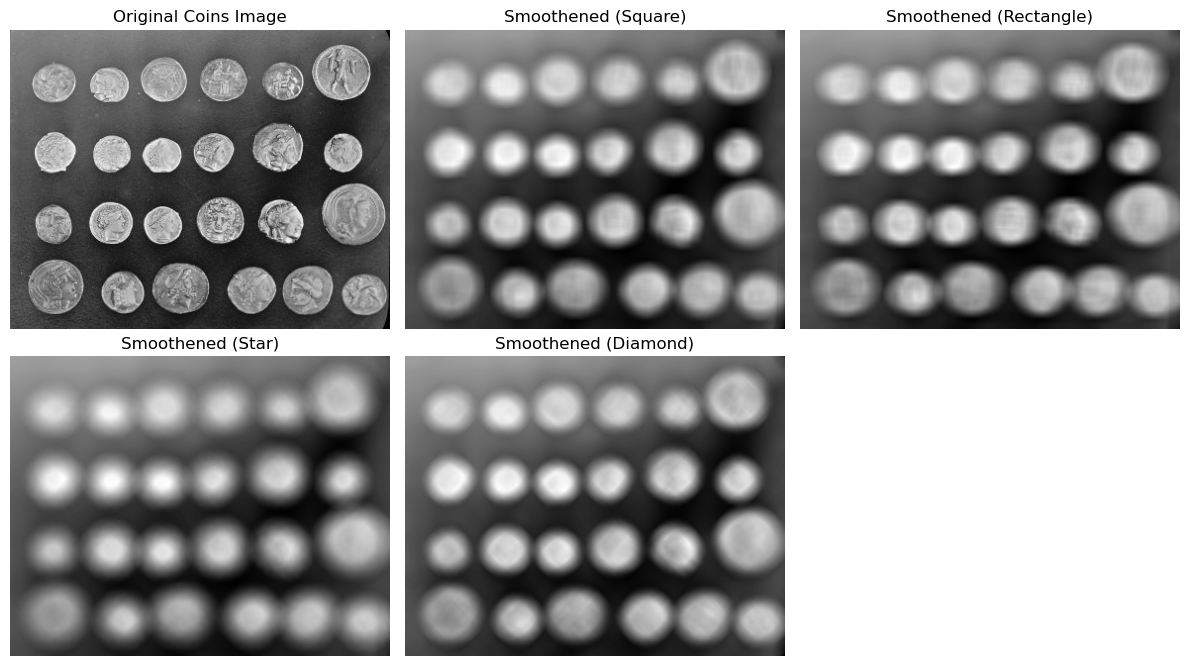

In [125]:
# solution

# Define different structuring elements
selem_square = square(15)
selem_rectangle = rectangle(10, 20)
selem_star = star(10)
selem_diamond = diamond(10)

# Apply mean filter with different structuring elements
smoothed_image_square = mean(coins_image, footprint=selem_square)
smoothed_image_rectangle = mean(coins_image, footprint=selem_rectangle)
smoothed_image_star = mean(coins_image, footprint=selem_star)
smoothed_image_diamond = mean(coins_image, footprint=selem_diamond)

# Visualize the smoothened images along with the original image
plt.figure(figsize=(12, 10))

# Original image
plt.subplot(3, 3, 1)
plt.imshow(coins_image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')

# Smoothened image with square selem
plt.subplot(3, 3, 2)
plt.imshow(smoothed_image_square, cmap='gray')
plt.title('Smoothened (Square)')
plt.axis('off')

# Smoothened image with rectangle selem
plt.subplot(3, 3, 3)
plt.imshow(smoothed_image_rectangle, cmap='gray')
plt.title('Smoothened (Rectangle)')
plt.axis('off')

# Smoothened image with star selem
plt.subplot(3, 3, 4)
plt.imshow(smoothed_image_star, cmap='gray')
plt.title('Smoothened (Star)')
plt.axis('off')

# Smoothened image with diamond selem
plt.subplot(3, 3, 5)
plt.imshow(smoothed_image_diamond, cmap='gray')
plt.title('Smoothened (Diamond)')
plt.axis('off')

plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

It seemed to increase the smoothing and loose the image details


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

The square striucture provides uniform smoothing in all directions
The rectangle structure provides directional smoothing
The start structure seems to be surrounded by several line segments
the diamond structure resembles a diamond shape with four different orientations



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

They have differences in the way they smooth the images, the Gaussian filter seems to have a smoother blur
